# Exploratory Data Analysis


In [493]:
import pandas as pd
import numpy as np
import seaborn as sns


In [494]:
data = pd.read_csv("Paitients_Files_Train.csv")

In [495]:
data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [496]:
data = pd.read_csv("Paitients_Files_Train.csv",index_col = "ID")

In [497]:
data.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
ID,,,,,,,,,,
ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


## 2 . Feature selection

In [498]:
features = ["PRG","PL","PR","SK","TS","M11","BD2","Age"]

### Splitting dataset into X and Y

In [499]:
X = data[features]
y = data["Sepssis"]

In [500]:
X.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age
ID,,,,,,,,
ICU200010,6,148,72,35,0,33.6,0.627,50
ICU200011,1,85,66,29,0,26.6,0.351,31
ICU200012,8,183,64,0,0,23.3,0.672,32
ICU200013,1,89,66,23,94,28.1,0.167,21
ICU200014,0,137,40,35,168,43.1,2.288,33


In [501]:
y.head()

ID
ICU200010    Positive
ICU200011    Negative
ICU200012    Positive
ICU200013    Negative
ICU200014    Positive
Name: Sepssis, dtype: object

### X,y -> X_Train, y_train, X_valid, y_valid

In [502]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train ,y_test = train_test_split(X,y , train_size = 0.8 , test_size = 0.2 , random_state=0)

In [503]:
X_train.shape


(479, 8)

In [504]:
X.shape

(599, 8)

In [505]:
data.shape

(599, 10)

# 4. Traning Machine Learning Model

In [506]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(
    penalty="l1",
    solver="liblinear",
    tol=1e-6,
    max_iter=int(1e6),
    warm_start=True,
    intercept_scaling=10000.0,
)


In [507]:
lr_model.fit(X_train,y_train)

LogisticRegression(intercept_scaling=10000.0, max_iter=1000000, penalty='l1',
                   solver='liblinear', tol=1e-06, warm_start=True)

In [508]:
print('Test Accuracy:',lr_model.score(X_test,y_test))
print('Train Accuracy:',lr_model.score(X_train,y_train))

Test Accuracy: 0.7833333333333333
Train Accuracy: 0.7828810020876826


In [509]:
y_preds = lr_model.predict(X_test)
y_pred_train = lr_model.predict(X_train)

In [510]:
y_preds

array(['Negative', 'Negative', 'Positive', 'Positive', 'Negative',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Positive', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negati

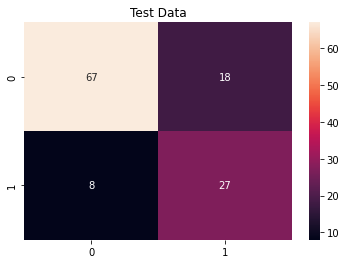

In [511]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
test = confusion_matrix(y_preds,y_test)
plt.title('Test Data')
sns.heatmap(data=test,annot=True,fmt='g')
plt.show()

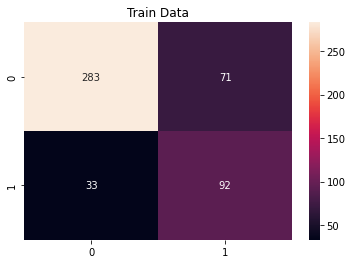

In [512]:
train = confusion_matrix(y_pred_train,y_train)
plt.title('Train Data')
sns.heatmap(data=train,annot=True,fmt='g')
plt.show()

## Decision Trees 

In [513]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)

In [514]:
print('Test Accuracy:',decision_tree.score(X_test,y_test))
print('Train Accuracy:',decision_tree.score(X_train,y_train))

Test Accuracy: 0.6333333333333333
Train Accuracy: 1.0


In [515]:
y_preds = decision_tree.predict(X_test)
y_pred_train = decision_tree.predict(X_train)

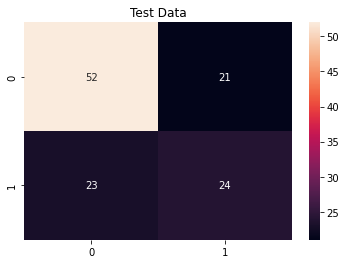

In [516]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
test = confusion_matrix(y_preds,y_test)
plt.title('Test Data')
sns.heatmap(data=test,annot=True,fmt='g')
plt.show()